We'll use NumPy and Matplotlib for the Python implementation. If you don't have these libraries installed, you can install them using pip:

Now let's write the core code for simulating a LIF neuron!

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Create a function to simulate a LIF neuron: specify input and output (documentation)
def lif(I, duration, dt):
    # generate LIF reponse (spike train) given a fixed current input
    # Input:       variable_name                            explanation
    #              I                                        staedy current input (an array of doulbe; A)
    #              duration                                 Duration of the simulation (a single value of integer; s)
    #              dt                                       Time bine size of the simulation (a single value of integer; s)
    #-------------------------------------------------------------------------------------------
    # Output:
    #              spikeTime                                spike timing of the LIF (an array of doubles; s)
    #              V                                        membrance potential timecourse (an array of doubles; V)

    # Setting up the simulation: make discritized time bins and set parameters of the neuron
    nBins = int(duration / dt)
    # set up a clock for sotring spike time
    clock = np.arange(0, nBins)

    # Intrinstic parameters of the LIF
    g_m = 25e-9  # S - > nS
    c_m = 250e-12   # F -> pF
    V_th = -50e-3   # V  -> mV
    V_reset = -70e-3  # V ->mV
    V_spike = 50e-3   #   V->mV
    V_rest = -65e-3   #   V->mV

    # Use a while loop or for loop to go through each time bin iteratively
    # Create space for storing the spike train (a binary or zeros array of length nBins)
    spikeTrain = np.zeros(nBins, dtype=int)
    # Create space (zeros of length nBins+2) for storing V_m. The extra 2 bins are for V_reset
    V_m = np.zeros(nBins + 2)
    # Set the initial membrane potential to be resting potential
    V_m[0] = V_rest
    # Set the initial time to be 0
    t = 0
    # Start the simulation
    while t < len(clock):
        # Calculate the change of V_m for the next time bin t+1, using the LIF model with Euler's method
        dv_dt = (-g_m * (V_m[t - 1] - V_rest) + I[t]) / c_m
        # Update V_m using Euler's method
        V_m[t] = V_m[t - 1] + dt * dv_dt

        # If membrane potential is higher than the AP threshold, generate a spike!
        if V_m[t] > V_th:
            V_m[t+1] = V_spike
            V_m[t+2] = V_reset
            V_m[t+3] = V_reset
            spikeTrain[t+1] = 1
            t+=2
        if t >= nBins:
            break
        t+=1

    spikeTime = clock[spikeTrain > 0] *dt
    return spikeTime, V_m


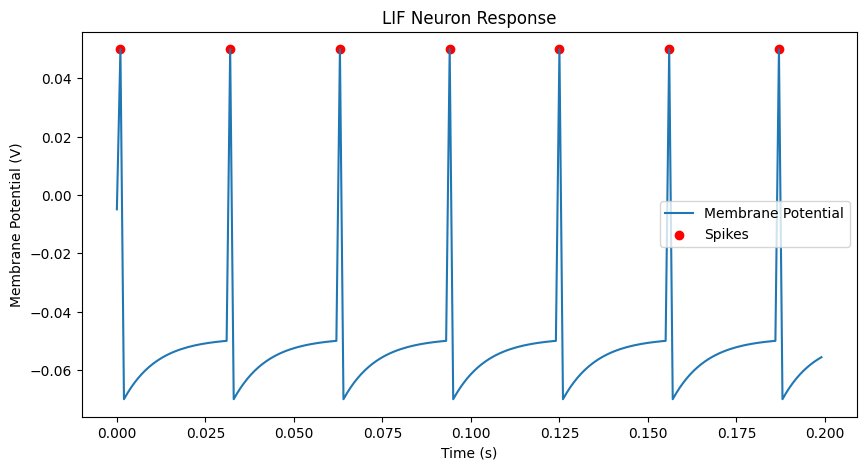

In [30]:
# Example usage:
duration = 0.2  # s
dt = 0.001  # s (1 ms)
time = np.arange(0, duration, dt)
I = 0.4*np.ones(len(time)) * 1e-9  # Steady current input level of 1 nA

spikeTime, V_m = lif(I, duration, dt)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, V_m[:len(time)], label='Membrane Potential')
plt.scatter(spikeTime, np.full(len(spikeTime), 0.05), color='red', label='Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.title('LIF Neuron Response')
plt.show()

### Generate a plot of the firing rate of a LIF as a function of current input

Also make plots like the above one for each of several different current inputs.

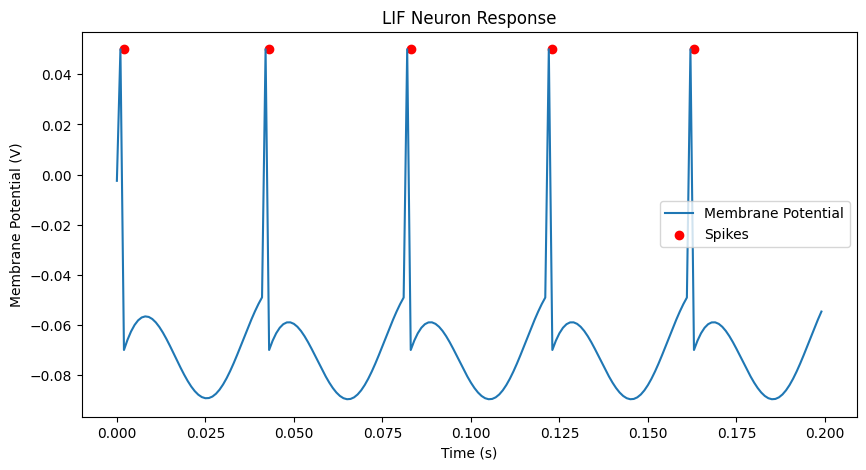

In [24]:
# Example usage:
duration = 0.2  # s
dt = 0.001  # s (1 ms)
time = np.arange(0, duration, dt)
I = np.cos(50 * np.pi * time) * 1e-9  # Steady current input level of 1 nA

spikeTime, V_m = lif(I, duration, dt)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, V_m[:len(time)], label='Membrane Potential')
plt.scatter(spikeTime, np.full(len(spikeTime), 0.05), color='red', label='Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()
plt.title('LIF Neuron Response')
plt.show()